<a href="https://colab.research.google.com/github/berlisuharmanto/Airlane-Passenger-Satisfaction-PySpark-Classification-using-Logistic-Regression/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 23 kB/s 
     |████████████████████████████████| 199 kB 25.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=a8043bec1bcfd069a1c6889f4c7a929d493818e60632a0b2bc04ed57d8b898c0
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("test_pyspark").getOrCreate()

In [ ]:
spark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = spark.read.csv("/content/drive/MyDrive/BISA AI/airline_passenger_satisfaction.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- type_of_travel: string (nullable = true)
 |-- customer_class: string (nullable = true)
 |-- flight_distance: integer (nullable = true)
 |-- inflight_wifi_service: integer (nullable = true)
 |-- departure_arrival_time_convenient: integer (nullable = true)
 |-- ease_of_online_booking: integer (nullable = true)
 |-- gate_location: integer (nullable = true)
 |-- food_and_drink: integer (nullable = true)
 |-- online_boarding: integer (nullable = true)
 |-- seat_comfort: integer (nullable = true)
 |-- inflight_entertainment: integer (nullable = true)
 |-- onboard_service: integer (nullable = true)
 |-- leg_room_service: integer (nullable = true)
 |-- baggage_handling: integer (nullable = true)
 |-- checkin_service: integer (nullable = true)
 |-- inflight_service: integer (nullable = true)
 |-- cleanliness: integer (nullable = tru

In [ ]:
df.columns

['_c0',
 'Gender',
 'customer_type',
 'age',
 'type_of_travel',
 'customer_class',
 'flight_distance',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'satisfaction']

In [ ]:
df.count()

129880

In [ ]:
len(df.columns)

24

In [ ]:
df.show()

+---+------+-----------------+---+---------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|Gender|    customer_type|age| type_of_travel|customer_class|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|
+---+------+-----------------+---+---------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+------

In [ ]:
df.describe().show()

+-------+-----------------+------+-----------------+------------------+---------------+--------------+------------------+---------------------+---------------------------------+----------------------+------------------+------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------------+------------------------+--------------------+
|summary|              _c0|Gender|    customer_type|               age| type_of_travel|customer_class|   flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|     gate_location|    food_and_drink|   online_boarding|      seat_comfort|inflight_entertainment|   onboard_service|  leg_room_service|  baggage_handling|   checkin_service|  inflight_service|       cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|
+-------+-----------------

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

In [ ]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+-------------+---+--------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|_c0|Gender|customer_type|age|type_of_travel|customer_class|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|satisfaction|
+---+------+-------------+---+--------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------

In [ ]:
from pyspark.sql.functions import coalesce

for i in df.columns[1]:
  df = df.withColumn("arrival_delay_in_minutes",coalesce(df.arrival_delay_in_minutes,df.departure_delay_in_minutes)) 

In [ ]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+-------------+---+--------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|_c0|Gender|customer_type|age|type_of_travel|customer_class|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|satisfaction|
+---+------+-------------+---+--------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_pandas = df.toPandas()

In [ ]:
df_pandas["customer_type"].value_counts(normalize=True)*100

Loyal Customer       81.690791
disloyal Customer    18.309209
Name: customer_type, dtype: float64

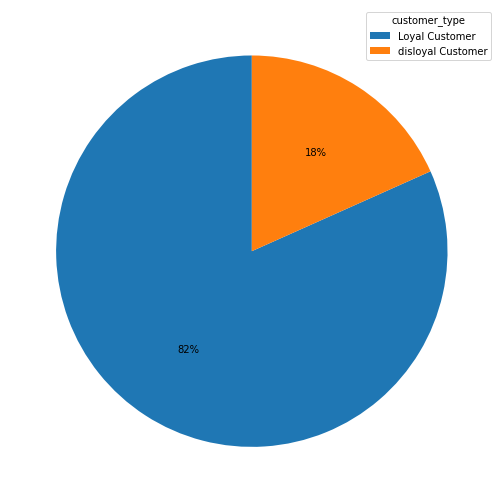

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=df_pandas['customer_type'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="customer_type", loc="upper right", labels=["Loyal Customer", "disloyal Customer"])
plt.show()

In [ ]:
columns = ['customer_type', 'type_of_travel', 'customer_class', 'flight_distance', 'departure_arrival_time_convenient', 'arrival_delay_in_minutes']

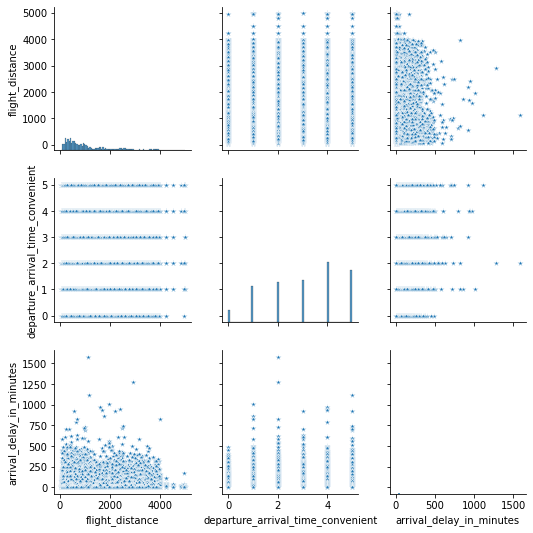

In [ ]:
sns.pairplot(df_pandas[columns], markers='*');

In [ ]:
df_pandas["type_of_travel"].value_counts(normalize=True)*100

Business travel    69.058362
Personal Travel    30.941638
Name: type_of_travel, dtype: float64

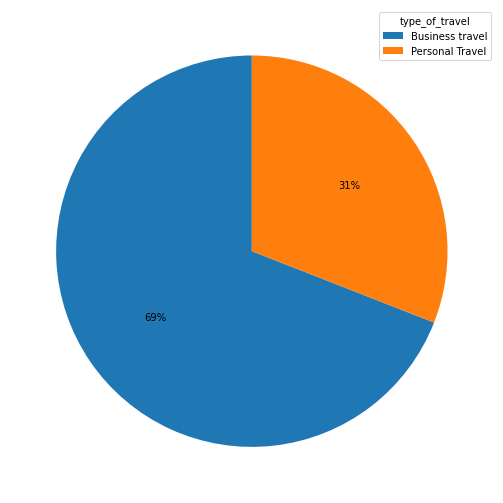

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=df_pandas['type_of_travel'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="type_of_travel", loc="upper right", labels=["Business travel", "Personal Travel"])
plt.show()

In [ ]:
df_pandas["customer_class"].value_counts(normalize=True)*100

Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: customer_class, dtype: float64

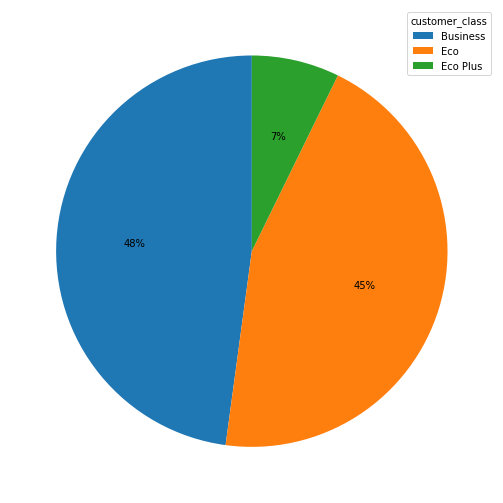

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=df_pandas['customer_class'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="customer_class", loc="upper right", labels=["Business", "Eco", "Eco Plus"])
plt.show()

In [ ]:
df_pandas["satisfaction"].value_counts(normalize=True)*100

0    56.553742
1    43.446258
Name: satisfaction, dtype: float64

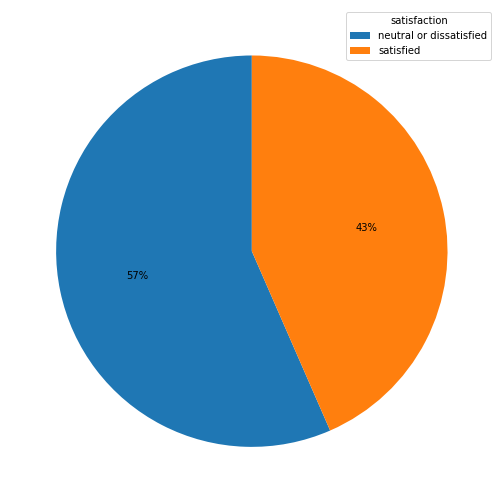

In [ ]:
plt.figure(figsize=(9,9))
plt.pie(x=df_pandas['satisfaction'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="satisfaction", loc="upper right", labels=["neutral or dissatisfied", "satisfied"])
plt.show()

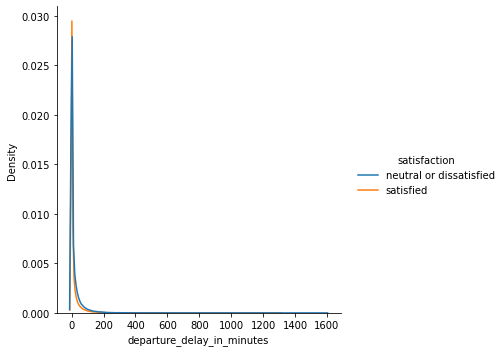

In [ ]:
sns.displot(data=df_pandas, x="departure_delay_in_minutes", kind='kde', hue='satisfaction');

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_pandas["satisfaction"] = label_encoder.fit_transform(df_pandas["satisfaction"])
df_pandas["satisfaction"]

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129880, dtype: int64

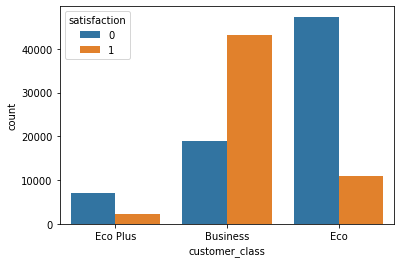

In [ ]:
sns.countplot(x='customer_class', hue='satisfaction', data=df_pandas)

In [ ]:
df_plot = df_pandas.groupby(['customer_class', 'satisfaction']).size().reset_index().pivot(columns='customer_class', index='satisfaction', values=0)

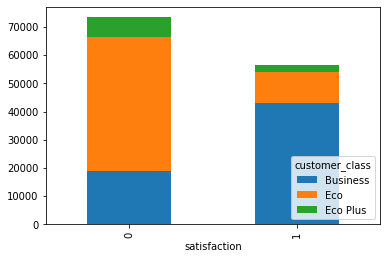

In [ ]:
df_plot.plot(kind='bar', stacked=True)

In [ ]:
df_plot = df_pandas.groupby(['type_of_travel', 'satisfaction']).size().reset_index().pivot(columns='type_of_travel', index='satisfaction', values=0)

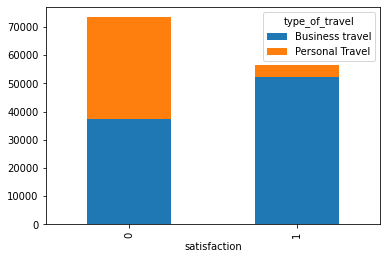

In [ ]:
df_plot.plot(kind='bar', stacked=True)

In [ ]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.ml.feature import *

In [ ]:
df = StringIndexer(inputCol='customer_type', outputCol='customer_type_idx').fit(df).transform(df)
df = df.drop("customer_type")
df = df.withColumnRenamed("customer_type_idx", "customer_type")
df.show(5)

+---+------+---+---------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+-------------+
|_c0|Gender|age| type_of_travel|customer_class|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|customer_type|
+---+------+---+---------------+--------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+-

In [ ]:
df = StringIndexer(inputCol='customer_class', outputCol='customer_class_idx').fit(df).transform(df)
df = df.drop("customer_class")
df = df.withColumnRenamed("customer_class_idx", "customer_class")
df.show(5)

+---+------+---+---------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+-------------+--------------+
|_c0|Gender|age| type_of_travel|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|customer_type|customer_class|
+---+------+---+---------------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+---

In [ ]:
df = StringIndexer(inputCol='type_of_travel', outputCol='type_of_travel_idx').fit(df).transform(df)
df = df.drop("type_of_travel")
df = df.withColumnRenamed("type_of_travel_idx", "type_of_travel")
df.show(5)

+---+------+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+-------------+--------------+--------------+
|_c0|Gender|age|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|customer_type|customer_class|type_of_travel|
+---+------+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+---------------------

In [ ]:
df = StringIndexer(inputCol='Gender', outputCol='Gender_idx').fit(df).transform(df)
df = df.drop("Gender")
df = df.withColumnRenamed("Gender_idx", "Gender")
df.show(5)

+---+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+-------------+--------------+--------------+------+
|_c0|age|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|        satisfaction|customer_type|customer_class|type_of_travel|Gender|
+---+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+-----

In [ ]:
df = StringIndexer(inputCol='satisfaction', outputCol='satisfaction_idx').fit(df).transform(df)
df = df.drop("satisfaction")
df = df.withColumnRenamed("satisfaction_idx", "satisfaction")
df.show(5)

+---+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+-------------+--------------+--------------+------+------------+
|_c0|age|flight_distance|inflight_wifi_service|departure_arrival_time_convenient|ease_of_online_booking|gate_location|food_and_drink|online_boarding|seat_comfort|inflight_entertainment|onboard_service|leg_room_service|baggage_handling|checkin_service|inflight_service|cleanliness|departure_delay_in_minutes|arrival_delay_in_minutes|customer_type|customer_class|type_of_travel|Gender|satisfaction|
+---+---+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+---------------+-----

In [ ]:
assembler = VectorAssembler(inputCols=['Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class', 'flight_distance','inflight_wifi_service','departure_arrival_time_convenient','food_and_drink','online_boarding','seat_comfort','inflight_entertainment','onboard_service','leg_room_service','baggage_handling','cleanliness','inflight_service','departure_delay_in_minutes','arrival_delay_in_minutes'], outputCol="features")
df = assembler.transform(df)

df.select('features', 'satisfaction').show(10, truncate=False)

+----------------------------------------------------------------------------------+------------+
|features                                                                          |satisfaction|
+----------------------------------------------------------------------------------+------------+
|[1.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,25.0,18.0]|0.0         |
|[1.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,6.0]  |0.0         |
|[0.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,0.0,0.0] |1.0         |
|[0.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,2.0,4.0,11.0,9.0] |0.0         |
|[1.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,0.0,0.0]  |1.0         |
|[0.0,0.0,26.0,1.0,1.0,1180.0,3.0,4.0,1.0,2.0,1.0,1.0,3.0,4.0,4.0,1.0,4.0,0.0,0.0] |0.0         |
|[1.0,0.0,47.0,1.0,1.0,1276.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,5.0,9.0,23.0]|0.0         |
|[0.0,0.0,52.0,0.0,0

In [ ]:
training, testing = df.randomSplit([0.75, 0.25], seed=42)
ratio = training.count() / df.count()
print(ratio)

0.7504311672312904


In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(labelCol="satisfaction", featuresCol="features", regParam=0.1, elasticNetParam=1.0, maxIter=500)
model_lr = lr.fit(training)

prediction = model_lr.transform(testing)
prediction.select('satisfaction', 'prediction', 'probability').show(5, False)

+------------+----------+----------------------------------------+
|satisfaction|prediction|probability                             |
+------------+----------+----------------------------------------+
|1.0         |1.0       |[0.27359440853155875,0.7264055914684413]|
|0.0         |0.0       |[0.8337830341447549,0.16621696585524515]|
|0.0         |0.0       |[0.6034063417933176,0.39659365820668235]|
|0.0         |0.0       |[0.6356705942996084,0.36432940570039163]|
|1.0         |0.0       |[0.630651473199495,0.369348526800505]   |
+------------+----------+----------------------------------------+
only showing top 5 rows



In [ ]:
prediction.groupBy('satisfaction', 'prediction').count().show()

TN = prediction.filter('prediction = 0 AND satisfaction = prediction').count()
TP = prediction.filter('prediction = 1 AND satisfaction = prediction').count()
FN = prediction.filter('prediction = 0 AND satisfaction != prediction').count()
FP = prediction.filter('prediction = 1 AND satisfaction != prediction').count()

accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+------------+----------+-----+
|satisfaction|prediction|count|
+------------+----------+-----+
|         1.0|       1.0|11057|
|         0.0|       1.0| 1639|
|         1.0|       0.0| 3091|
|         0.0|       0.0|16627|
+------------+----------+-----+

0.8540753995187265


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
y_true = prediction.select("satisfaction").collect()
y_pred = prediction.select("prediction").collect()

print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     18266
         1.0       0.87      0.78      0.82     14148

    accuracy                           0.85     32414
   macro avg       0.86      0.85      0.85     32414
weighted avg       0.86      0.85      0.85     32414



array([[16627,  1639],
       [ 3091, 11057]])

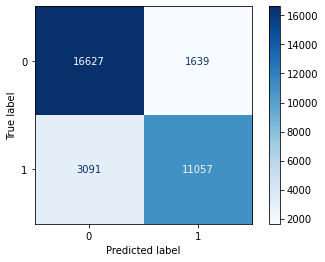

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=[0,1])
display.plot(cmap=plt.cm.Blues)
plt.show()